In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/wine.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [5]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder(categories=[['Low','Medium','High']])
df1=enc.fit_transform(data[['Alcohol_content']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

In [6]:
data.Alcohol_content=df1

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5


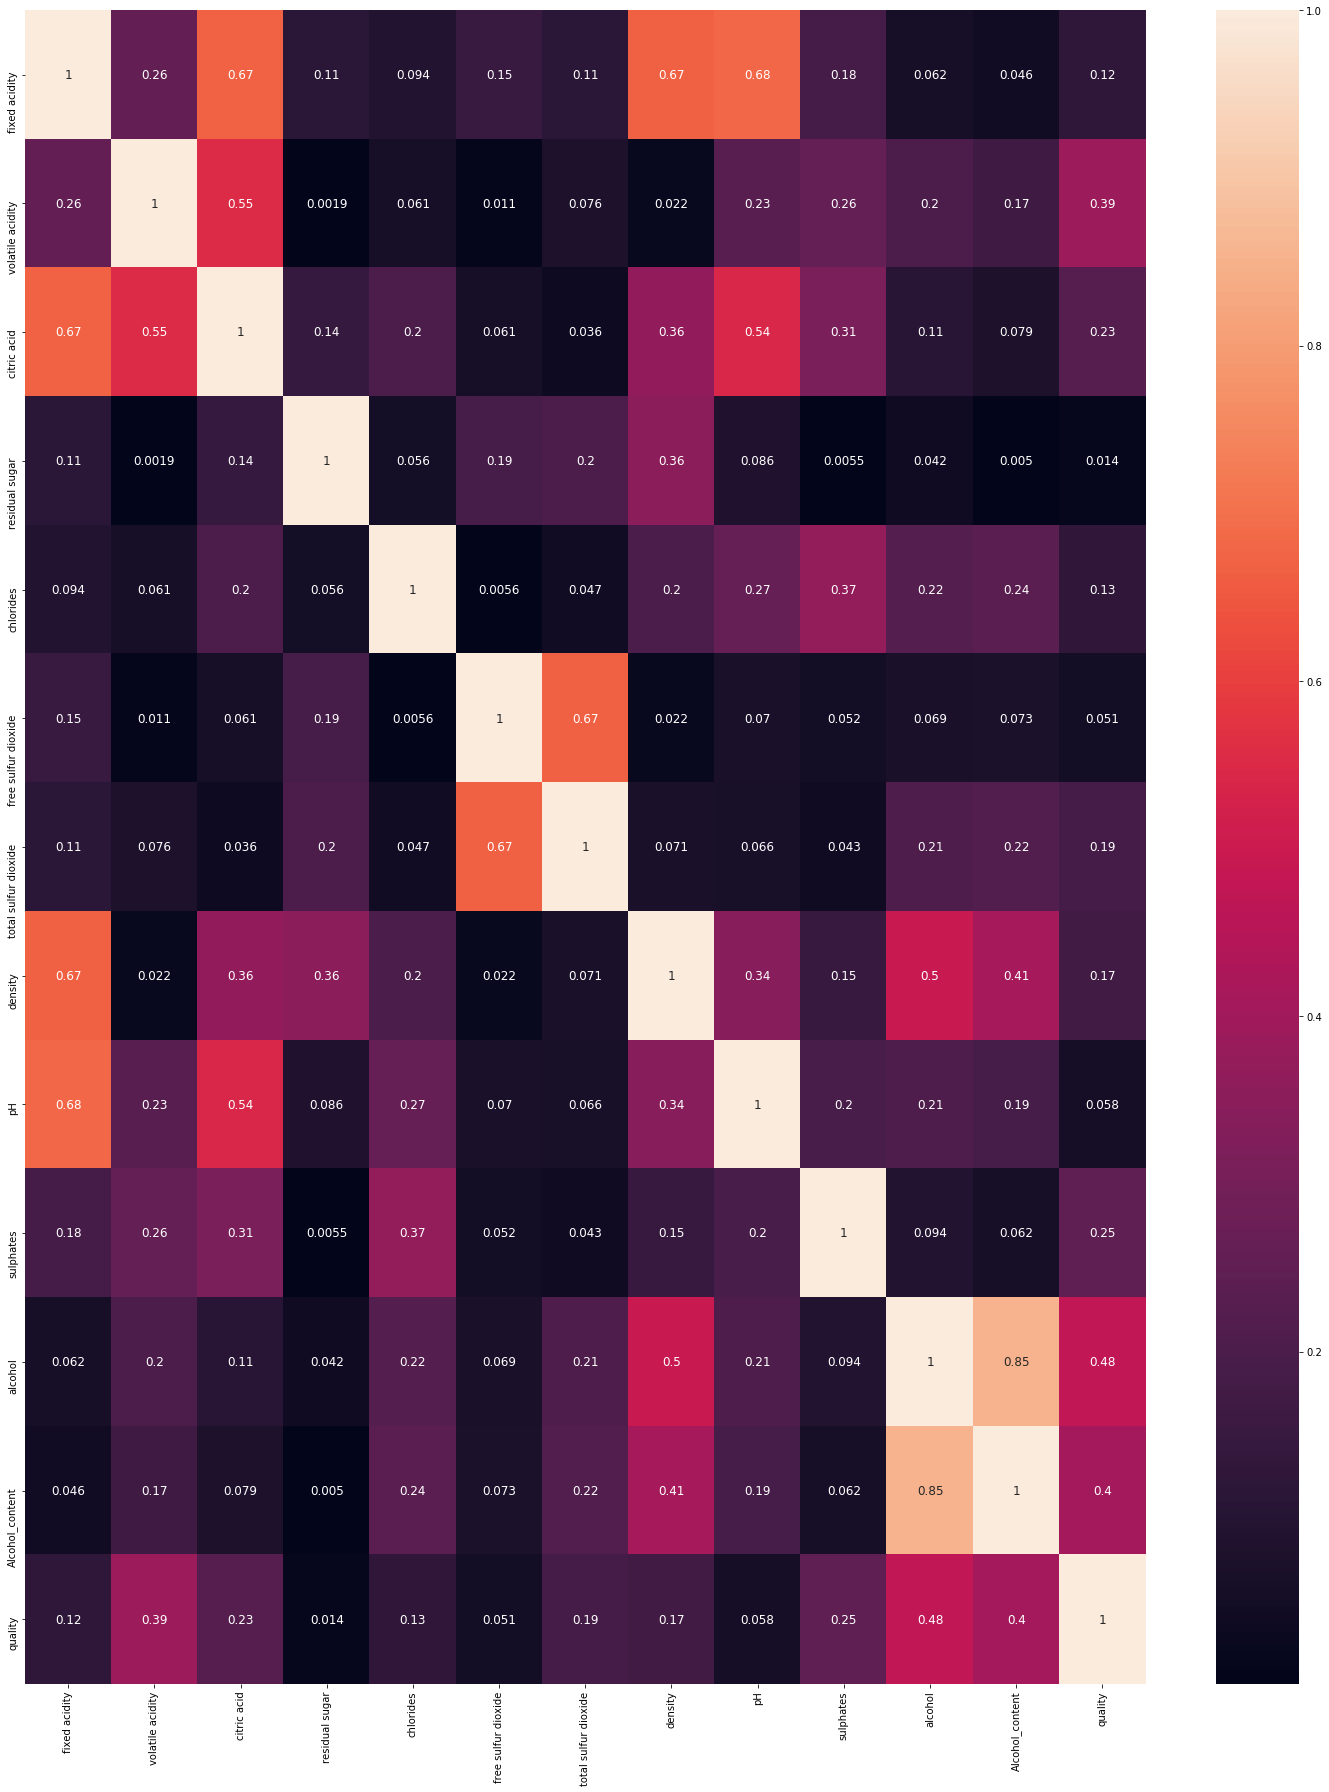

In [8]:
plt.figure(figsize=(20,25))
df_corr=data.corr().abs()
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.tight_layout()

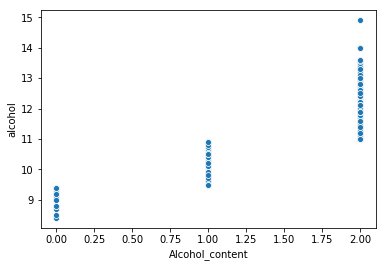

In [9]:
sns.scatterplot(x='Alcohol_content',y='alcohol',data=data)

In [10]:
X=data.drop(columns=['quality','Alcohol_content'])
y=data.quality

In [11]:
X_train,X_test,Y_Train,Y_test=train_test_split(X,y,test_size=0.25,random_state=355)

In [12]:
clf=DecisionTreeClassifier()
clf.fit(X_train,Y_Train)

DecisionTreeClassifier()

In [13]:
feature_name=list(X.columns)
class_name=list(Y_Train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [24]:
class_name

[6, 5, 7, 4, 8, 3]

from sklearn.tree import export_graphviz

# !pip install graphviz

import graphviz

from sklearn import tree



# !pip install pydotplus

import pydotplus



!pip install IPython.display

from IPython.display import image

In [17]:
clf.score(X_train,Y_Train)

1.0

In [25]:
Y_pred=clf.predict(X_test)

In [27]:
Y_pred

array([5, 6, 7, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 7, 7, 6, 7, 7, 7, 6, 6,
       5, 7, 6, 5, 5, 5, 6, 6, 6, 5, 6, 7, 5, 6, 5, 4, 5, 7, 5, 6, 5, 6,
       5, 6, 6, 6, 6, 6, 7, 5, 5, 6, 5, 5, 5, 7, 5, 7, 5, 5, 5, 5, 7, 7,
       7, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 4, 7, 5, 5, 5, 5, 5, 5, 5,
       4, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 4, 8, 7, 6, 6,
       6, 6, 5, 5, 7, 6, 5, 7, 5, 6, 5, 5, 6, 5, 7, 7, 5, 5, 6, 6, 6, 7,
       6, 5, 6, 5, 6, 5, 6, 7, 6, 7, 7, 6, 6, 7, 5, 5, 6, 7, 6, 7, 5, 5,
       6, 5, 5, 6, 7, 5, 6, 6, 6, 6, 5, 6, 6, 7, 5, 7, 7, 6, 5, 7, 6, 6,
       6, 6, 5, 6, 7, 5, 6, 6, 6, 6, 5, 6, 5, 7, 5, 7, 7, 5, 6, 5, 5, 7,
       7, 6, 6, 5, 6, 5, 7, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 8, 6, 6, 5, 5,
       6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 4, 5, 5, 6, 7, 5, 7, 6, 5, 5, 5,
       5, 5, 7, 7, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 7, 5, 5, 6, 5, 5,
       6, 6, 6, 6, 7, 6, 6, 5, 5, 6, 7, 5, 6, 6, 5, 5, 6, 5, 7, 6, 6, 6,
       5, 7, 6, 7, 5, 5, 4, 5, 5, 5, 5, 7, 6, 5, 7,

In [26]:
accuracy_score(Y_test,Y_pred)

0.6075

In [20]:
grid_param={
            'criterion':['entropy','gini'],
            'max_depth':range(7,15),
            'min_impurity_split':range(2,10),
            'min_samples_leaf':range(1,4), 'min_samples_split':range(2,10)
}

In [21]:
grid=GridSearchCV(estimator=clf,cv=5,param_grid=grid_param,n_jobs=-1)

In [23]:
grid.fit(X_train,Y_Train)

ValueError: Invalid parameter min_impurity_split for estimator DecisionTreeClassifier(criterion='entropy', max_depth=7). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
best_param=grid.best_params_

In [ ]:
best_param

In [ ]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=7,min_impurity_split=2,min_samples_leaf=1)

In [ ]:
clf.fit(X_train,Y_Train)

In [ ]:
Y_pred=clf.predict(X)